<a href="https://colab.research.google.com/github/Alisya0910/SkripsiAlisya/blob/Final/DataPreprocessingGanjar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proses Data Preprocessing**

1.   Cleaning Data (membersihkan data
twitter dari mention, url, dll)
2. Casefolding (mengubah huruf kapital menjadi huruf kecil)
3.  Stemming (mengubah kata menjadi kata dasarnya)
4. Filtering (menghapus stopword dan tokenize)
5. TF - IDF

In [1]:
#mengimport library  yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re

menampilkan data asli

In [2]:
Data = pd.read_excel('GanjarPresidentTweets.xlsx')

Data

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Tue Nov 07 04:56:57 +0000 2023,1721750000000000000,Repost dari Bapak @hary_tanoe https://t.co/AP...,0,0,0,0,in,88593647,1721750000000000000,mnctrijaya,https://twitter.com/mnctrijaya/status/17217535...
1,Tue Nov 07 04:56:18 +0000 2023,1721750000000000000,Gaspol datang ke Pesta Rakyat Ganjar Pranowo y...,0,0,0,0,in,2503761613,1721750000000000000,IDSahabatGanjar,https://twitter.com/IDSahabatGanjar/status/172...
2,Tue Nov 07 04:56:16 +0000 2023,1721750000000000000,Ratusan Pekerja Migran Indonesia (PMI) di kota...,0,0,0,0,in,2723605698,1721750000000000000,pdip_sa,https://twitter.com/pdip_sa/status/17217534125...
3,Tue Nov 07 04:56:11 +0000 2023,1721750000000000000,Pak Ganjar Pranowo memperlihatkan bahwa beliau...,0,0,0,0,in,1686570000000000000,1721750000000000000,sekarknsh2_,https://twitter.com/sekarknsh2_/status/1721753...
4,Tue Nov 07 04:56:07 +0000 2023,1721750000000000000,"Benarkah....??? Nyukkk, kita buktikan 2024 Gan...",0,0,0,0,in,1605180000000000000,1721750000000000000,AlfatihDhany,https://twitter.com/AlfatihDhany/status/172175...
...,...,...,...,...,...,...,...,...,...,...,...,...
508,Tue Nov 07 04:03:17 +0000 2023,1721740000000000000,Ganjar pranowo menyoroti pentingnya pemerataan...,0,0,0,0,in,1401320000000000000,1721740000000000000,_cakalang_,https://twitter.com/_cakalang_/status/17217400...
509,Tue Nov 07 04:03:10 +0000 2023,1721740000000000000,Warga Transmigran Sumatera Selatan sangat antu...,0,0,0,0,in,531793189,1721740000000000000,Sang_Nurani,https://twitter.com/Sang_Nurani/status/1721740...
510,Tue Nov 07 04:03:08 +0000 2023,1721740000000000000,@TeddGus @gibran_tweet @ganjarpranowo kok bisa...,0,0,0,0,in,339464954,1719320000000000000,Tawnykitteh,https://twitter.com/Tawnykitteh/status/1721740...
511,Tue Nov 07 04:03:05 +0000 2023,1721740000000000000,@genx36545403 @gibran_tweet @ganjarpranowo @mo...,0,0,0,0,in,990505000000000000,1721530000000000000,1933389125Lumie,https://twitter.com/1933389125Lumie/status/172...


# 1. **Cleaning Data**
---
Membersihkan data dari mention, url, emoji, dan lainnya


Menampilkan attribut full_text saja karena attribut full_text yang akan di pre-processing

In [3]:
Data = Data[['full_text']]

Data

,full_text
0,Repost dari Bapak @hary_tanoe https://t.co/AP...
1,Gaspol datang ke Pesta Rakyat Ganjar Pranowo y...
2,Ratusan Pekerja Migran Indonesia (PMI) di kota...
3,Pak Ganjar Pranowo memperlihatkan bahwa beliau...
4,"Benarkah....??? Nyukkk, kita buktikan 2024 Gan..."
...,...
508,Ganjar pranowo menyoroti pentingnya pemerataan...
509,Warga Transmigran Sumatera Selatan sangat antu...
510,@TeddGus @gibran_tweet @ganjarpranowo kok bisa...
511,@genx36545403 @gibran_tweet @ganjarpranowo @mo...


In [4]:
Data['clean_text'] = Data.loc[:, 'full_text']

<ipython-input-4-3ca4832aec66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['clean_text'] = Data.loc[:, 'full_text']


In [5]:
Data

,full_text,clean_text
0,Repost dari Bapak @hary_tanoe https://t.co/AP...,Repost dari Bapak @hary_tanoe https://t.co/AP...
1,Gaspol datang ke Pesta Rakyat Ganjar Pranowo y...,Gaspol datang ke Pesta Rakyat Ganjar Pranowo y...
2,Ratusan Pekerja Migran Indonesia (PMI) di kota...,Ratusan Pekerja Migran Indonesia (PMI) di kota...
3,Pak Ganjar Pranowo memperlihatkan bahwa beliau...,Pak Ganjar Pranowo memperlihatkan bahwa beliau...
4,"Benarkah....??? Nyukkk, kita buktikan 2024 Gan...","Benarkah....??? Nyukkk, kita buktikan 2024 Gan..."
...,...,...
508,Ganjar pranowo menyoroti pentingnya pemerataan...,Ganjar pranowo menyoroti pentingnya pemerataan...
509,Warga Transmigran Sumatera Selatan sangat antu...,Warga Transmigran Sumatera Selatan sangat antu...
510,@TeddGus @gibran_tweet @ganjarpranowo kok bisa...,@TeddGus @gibran_tweet @ganjarpranowo kok bisa...
511,@genx36545403 @gibran_tweet @ganjarpranowo @mo...,@genx36545403 @gibran_tweet @ganjarpranowo @mo...


In [6]:
#Text-Cleaning (URLs, Mentions, etc)
#installing tweet-preprocessor
!pip install tweet-preprocessor

In [7]:
import preprocessor as p

In [8]:
def preprocess_tweet(row):
    text = row['clean_text']
    text = p.clean(text)
    return text

Data['clean_text'] = Data.apply(preprocess_tweet, axis=1)

<ipython-input-8-4049b9197ac6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['clean_text'] = Data.apply(preprocess_tweet, axis=1)


In [9]:
Data

,full_text,clean_text
0,Repost dari Bapak @hary_tanoe https://t.co/AP...,Repost dari Bapak
1,Gaspol datang ke Pesta Rakyat Ganjar Pranowo y...,Gaspol datang ke Pesta Rakyat Ganjar Pranowo y...
2,Ratusan Pekerja Migran Indonesia (PMI) di kota...,Ratusan Pekerja Migran Indonesia (PMI) di kota...
3,Pak Ganjar Pranowo memperlihatkan bahwa beliau...,Pak Ganjar Pranowo memperlihatkan bahwa beliau...
4,"Benarkah....??? Nyukkk, kita buktikan 2024 Gan...","Benarkah....??? Nyukkk, kita buktikan Ganjar P..."
...,...,...
508,Ganjar pranowo menyoroti pentingnya pemerataan...,Ganjar pranowo menyoroti pentingnya pemerataan...
509,Warga Transmigran Sumatera Selatan sangat antu...,Warga Transmigran Sumatera Selatan sangat antu...
510,@TeddGus @gibran_tweet @ganjarpranowo kok bisa...,kok bisa jadi narsum bang
511,@genx36545403 @gibran_tweet @ganjarpranowo @mo...,di tunggu update berita selanjutnya


In [10]:
#untuk menghapus data yang Nan atau data kosong setelah di filtering

#Data = Data[Data != '']
#Data = Data.dropna()

#2. **Casefolding**
---
menghapus tanda baca, extra whitespace dan mengubah huruf besar manjadi huruf kecil


In [11]:
#menghapus extra white space, punctuation, dan menlowercase kan
Data['clean_text'] = Data['clean_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ').str.replace('\d+', '')

<ipython-input-11-be7208876281>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Data['clean_text'] = Data['clean_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ').str.replace('\d+', '')
<ipython-input-11-be7208876281>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['clean_text'] = Data['clean_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ').str.replace('\d+', '')


In [12]:
Data

,full_text,clean_text
0,Repost dari Bapak @hary_tanoe https://t.co/AP...,repost dari bapak
1,Gaspol datang ke Pesta Rakyat Ganjar Pranowo y...,gaspol datang ke pesta rakyat ganjar pranowo y...
2,Ratusan Pekerja Migran Indonesia (PMI) di kota...,ratusan pekerja migran indonesia pmi di kota r...
3,Pak Ganjar Pranowo memperlihatkan bahwa beliau...,pak ganjar pranowo memperlihatkan bahwa beliau...
4,"Benarkah....??? Nyukkk, kita buktikan 2024 Gan...",benarkah nyukkk kita buktikan ganjar presiden ...
...,...,...
508,Ganjar pranowo menyoroti pentingnya pemerataan...,ganjar pranowo menyoroti pentingnya pemerataan...
509,Warga Transmigran Sumatera Selatan sangat antu...,warga transmigran sumatera selatan sangat antu...
510,@TeddGus @gibran_tweet @ganjarpranowo kok bisa...,kok bisa jadi narsum bang
511,@genx36545403 @gibran_tweet @ganjarpranowo @mo...,di tunggu update berita selanjutnya


#3. **Stemming**

---
https://ksnugroho.medium.com/dasar-text-preprocessing-dengan-python-*a4fa52608ffe*


In [13]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.7 MB/s eta 0:00:00


In [14]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd

# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat DataFrame contoh
Data['stemword'] = pd.DataFrame(Data['clean_text'])


# Mendefinisikan fungsi stemming
def stemming(text):
    return stemmer.stem(text)

# Menerapkan fungsi stemming ke kolom 'TextColumn'
Data['stemword'] = Data['clean_text'].apply(str).apply(stemming)

# Menampilkan DataFrame hasil


<ipython-input-14-0e8e2e4a94e7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['stemword'] = pd.DataFrame(Data['clean_text'])
<ipython-input-14-0e8e2e4a94e7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['stemword'] = Data['clean_text'].apply(str).apply(stemming)


In [15]:
Data

,full_text,clean_text,stemword
0,Repost dari Bapak @hary_tanoe https://t.co/AP...,repost dari bapak,repost dari bapak
1,Gaspol datang ke Pesta Rakyat Ganjar Pranowo y...,gaspol datang ke pesta rakyat ganjar pranowo y...,gaspol datang ke pesta rakyat ganjar pranowo y...
2,Ratusan Pekerja Migran Indonesia (PMI) di kota...,ratusan pekerja migran indonesia pmi di kota r...,ratus kerja migran indonesia pmi di kota riyad...
3,Pak Ganjar Pranowo memperlihatkan bahwa beliau...,pak ganjar pranowo memperlihatkan bahwa beliau...,pak ganjar pranowo lihat bahwa beliau pikir ma...
4,"Benarkah....??? Nyukkk, kita buktikan 2024 Gan...",benarkah nyukkk kita buktikan ganjar presiden ...,benar nyukkk kita bukti ganjar presiden mau li...
...,...,...,...
508,Ganjar pranowo menyoroti pentingnya pemerataan...,ganjar pranowo menyoroti pentingnya pemerataan...,ganjar pranowo sorot penting perata bangun den...
509,Warga Transmigran Sumatera Selatan sangat antu...,warga transmigran sumatera selatan sangat antu...,warga transmigran sumatera selatan sangat antu...
510,@TeddGus @gibran_tweet @ganjarpranowo kok bisa...,kok bisa jadi narsum bang,kok bisa jadi narsum bang
511,@genx36545403 @gibran_tweet @ganjarpranowo @mo...,di tunggu update berita selanjutnya,di tunggu update berita lanjut


In [16]:
Data[['clean_text','stemword']]

,clean_text,stemword
0,repost dari bapak,repost dari bapak
1,gaspol datang ke pesta rakyat ganjar pranowo y...,gaspol datang ke pesta rakyat ganjar pranowo y...
2,ratusan pekerja migran indonesia pmi di kota r...,ratus kerja migran indonesia pmi di kota riyad...
3,pak ganjar pranowo memperlihatkan bahwa beliau...,pak ganjar pranowo lihat bahwa beliau pikir ma...
4,benarkah nyukkk kita buktikan ganjar presiden ...,benar nyukkk kita bukti ganjar presiden mau li...
...,...,...
508,ganjar pranowo menyoroti pentingnya pemerataan...,ganjar pranowo sorot penting perata bangun den...
509,warga transmigran sumatera selatan sangat antu...,warga transmigran sumatera selatan sangat antu...
510,kok bisa jadi narsum bang,kok bisa jadi narsum bang
511,di tunggu update berita selanjutnya,di tunggu update berita lanjut


#4. **Filtering (Penghapusan stopword & Tokenizing)**


---
tokenize memenggal kalimat menjadi perkata, Penghapusan stopword berfungsi untuk menghilangkan kata yang tidak memiliki nilai sentimen atau kata dasar seperti kata yang, dan, di, dari, dan lain sebagainya.



In [17]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Download kumpulan stopword untuk bahasa Indonesia
nltk.download('punkt')
nltk.download('stopwords')

# Contoh DataFrame
Data['stemword'] = pd.DataFrame(Data['stemword'])

# Fungsi untuk melakukan tokenisasi dan penghapusan stopword
def tokenize_and_remove_stopwords(text):
    # Tokenisasi kata-kata
    words = word_tokenize(text)

    # Mengambil stopword bahasa Indonesia
    stop_words = set(stopwords.words('indonesian'))

    # Menghapus stopword dari kata-kata
    filtered_words = [word for word in words if word.lower() not in stop_words]

    return filtered_words

# Tokenisasi dan penghapusan stopword pada setiap elemen dalam kolom 'Text'
Data['Tokenized_and_No_Stopwords'] = Data['stemword'].apply(tokenize_and_remove_stopwords)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-17-f71c0bd25aa3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['stemword'] = pd.DataFrame(Data['stemword'])
<ipython-input-17-f71c0bd25aa3>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Tokenized_and_No_Stopwords'] = Data['stemword'].apply(tokenize_and_remove_s

In [18]:
Data

,full_text,clean_text,stemword,Tokenized_and_No_Stopwords
0,Repost dari Bapak @hary_tanoe https://t.co/AP...,repost dari bapak,repost dari bapak,[repost]
1,Gaspol datang ke Pesta Rakyat Ganjar Pranowo y...,gaspol datang ke pesta rakyat ganjar pranowo y...,gaspol datang ke pesta rakyat ganjar pranowo y...,"[gaspol, pesta, rakyat, ganjar, pranowo, langs..."
2,Ratusan Pekerja Migran Indonesia (PMI) di kota...,ratusan pekerja migran indonesia pmi di kota r...,ratus kerja migran indonesia pmi di kota riyad...,"[ratus, kerja, migran, indonesia, pmi, kota, r..."
3,Pak Ganjar Pranowo memperlihatkan bahwa beliau...,pak ganjar pranowo memperlihatkan bahwa beliau...,pak ganjar pranowo lihat bahwa beliau pikir ma...,"[ganjar, pranowo, lihat, beliau, pikir, mileni..."
4,"Benarkah....??? Nyukkk, kita buktikan 2024 Gan...",benarkah nyukkk kita buktikan ganjar presiden ...,benar nyukkk kita bukti ganjar presiden mau li...,"[nyukkk, bukti, ganjar, presiden, liat, dukung..."
...,...,...,...,...
508,Ganjar pranowo menyoroti pentingnya pemerataan...,ganjar pranowo menyoroti pentingnya pemerataan...,ganjar pranowo sorot penting perata bangun den...,"[ganjar, pranowo, sorot, perata, bangun, airfa..."
509,Warga Transmigran Sumatera Selatan sangat antu...,warga transmigran sumatera selatan sangat antu...,warga transmigran sumatera selatan sangat antu...,"[warga, transmigran, sumatera, selatan, antusi..."
510,@TeddGus @gibran_tweet @ganjarpranowo kok bisa...,kok bisa jadi narsum bang,kok bisa jadi narsum bang,"[narsum, bang]"
511,@genx36545403 @gibran_tweet @ganjarpranowo @mo...,di tunggu update berita selanjutnya,di tunggu update berita lanjut,"[tunggu, update, berita]"


In [19]:
Data[['stemword','Tokenized_and_No_Stopwords']]

,stemword,Tokenized_and_No_Stopwords
0,repost dari bapak,[repost]
1,gaspol datang ke pesta rakyat ganjar pranowo y...,"[gaspol, pesta, rakyat, ganjar, pranowo, langs..."
2,ratus kerja migran indonesia pmi di kota riyad...,"[ratus, kerja, migran, indonesia, pmi, kota, r..."
3,pak ganjar pranowo lihat bahwa beliau pikir ma...,"[ganjar, pranowo, lihat, beliau, pikir, mileni..."
4,benar nyukkk kita bukti ganjar presiden mau li...,"[nyukkk, bukti, ganjar, presiden, liat, dukung..."
...,...,...
508,ganjar pranowo sorot penting perata bangun den...,"[ganjar, pranowo, sorot, perata, bangun, airfa..."
509,warga transmigran sumatera selatan sangat antu...,"[warga, transmigran, sumatera, selatan, antusi..."
510,kok bisa jadi narsum bang,"[narsum, bang]"
511,di tunggu update berita lanjut,"[tunggu, update, berita]"


# 5. **Data Labeling**

---
Melabelkan sentimen analisis data


membuat variable anies_sentimen untuk menampung data yang perlu di labelkan

In [20]:
!pip install transformers

In [21]:
from transformers import pipeline
import pandas as pd

# Inisialisasi model BERT untuk analisis sentimen
classifier = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Fungsi untuk prediksi sentimen pada teks
def predict_sentiment(text):
    result = classifier(text)[0]
    sentiment_label = result['label']
    sentiment_score = result['score']
    return sentiment_label, sentiment_score

# Prediksi sentimen untuk setiap teks dalam series
sentiment_predictions = Data['clean_text'].apply(predict_sentiment)

# Menyatukan hasil prediksi dengan dataset
result_df = pd.DataFrame(list(sentiment_predictions), columns=['Sentimen_Label', 'Sentimen_Score'])
final_result = pd.concat([Data['clean_text'], result_df], axis=1)

print(final_result)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

                                            clean_text Sentimen_Label  \
0                                    repost dari bapak        5 stars   
1    gaspol datang ke pesta rakyat ganjar pranowo y...        5 stars   
2    ratusan pekerja migran indonesia pmi di kota r...         1 star   
3    pak ganjar pranowo memperlihatkan bahwa beliau...        5 stars   
4    benarkah nyukkk kita buktikan ganjar presiden ...         1 star   
..                                                 ...            ...   
508  ganjar pranowo menyoroti pentingnya pemerataan...        4 stars   
509  warga transmigran sumatera selatan sangat antu...        5 stars   
510                          kok bisa jadi narsum bang         1 star   
511                di tunggu update berita selanjutnya        3 stars   
512  waduh face to face ngeri ahh mending pikiran p...         1 star   

     Sentimen_Score  
0          0.377393  
1          0.251743  
2          0.245142  
3          0.336650  
4          0.

In [22]:
import pandas as pd

def Sentiment_startovalue(label):
    if label in ["1 star", "2 stars"]:
        return 'Negative'
    elif label == "3 stars":
        return 'Neutral'
    elif label in ["4 stars", "5 stars"]:
        return 'Positive'
    else:
        return 'Unknown'

# Apply the function to the entire 'Sentimen_Label' column
Data['Sentimen_value'] = result_df['Sentimen_Label'].apply(Sentiment_startovalue)


<ipython-input-22-895fc17b81b1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Sentimen_value'] = result_df['Sentimen_Label'].apply(Sentiment_startovalue)


In [23]:
Data['Labeling'] = result_df['Sentimen_Label']
Data['Sentimen_score'] = result_df['Sentimen_Score']

<ipython-input-23-e86ca2f4e556>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Labeling'] = result_df['Sentimen_Label']
<ipython-input-23-e86ca2f4e556>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Sentimen_score'] = result_df['Sentimen_Score']


In [24]:
Data[['clean_text','Sentimen_value','Labeling','Sentimen_score']]

,clean_text,Sentimen_value,Labeling,Sentimen_score
0,repost dari bapak,Positive,5 stars,0.377393
1,gaspol datang ke pesta rakyat ganjar pranowo y...,Positive,5 stars,0.251743
2,ratusan pekerja migran indonesia pmi di kota r...,Negative,1 star,0.245142
3,pak ganjar pranowo memperlihatkan bahwa beliau...,Positive,5 stars,0.336650
4,benarkah nyukkk kita buktikan ganjar presiden ...,Negative,1 star,0.632900
...,...,...,...,...
508,ganjar pranowo menyoroti pentingnya pemerataan...,Positive,4 stars,0.367589
509,warga transmigran sumatera selatan sangat antu...,Positive,5 stars,0.539500
510,kok bisa jadi narsum bang,Negative,1 star,0.317085
511,di tunggu update berita selanjutnya,Neutral,3 stars,0.227741


In [25]:
senti_Ganjar = Data[['clean_text','Sentimen_value']]

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
senti_Ganjar['label'] = label_encoder.fit_transform(senti_Ganjar['Sentimen_value'])

<ipython-input-25-5b8d9e43b7fc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti_Ganjar['label'] = label_encoder.fit_transform(senti_Ganjar['Sentimen_value'])


In [26]:
senti_Ganjar

,clean_text,Sentimen_value,label
0,repost dari bapak,Positive,2
1,gaspol datang ke pesta rakyat ganjar pranowo y...,Positive,2
2,ratusan pekerja migran indonesia pmi di kota r...,Negative,0
3,pak ganjar pranowo memperlihatkan bahwa beliau...,Positive,2
4,benarkah nyukkk kita buktikan ganjar presiden ...,Negative,0
...,...,...,...
508,ganjar pranowo menyoroti pentingnya pemerataan...,Positive,2
509,warga transmigran sumatera selatan sangat antu...,Positive,2
510,kok bisa jadi narsum bang,Negative,0
511,di tunggu update berita selanjutnya,Neutral,1


In [27]:
senti_Ganjar['Sentimen_value'].value_counts()

Positive    290
Negative    166
Neutral      57
Name: Sentimen_value, dtype: int64

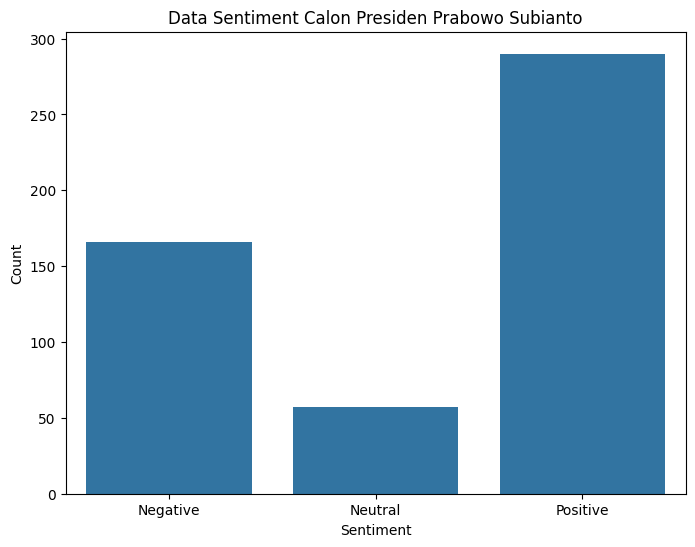

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment
sentiment_counts = dict(zip(*np.unique(senti_Ganjar['Sentimen_value'], return_counts=True)))

# Bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=list(sentiment_counts.keys()), y=list(sentiment_counts.values()))
plt.title('Data Sentiment Calon Presiden Prabowo Subianto')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.show()


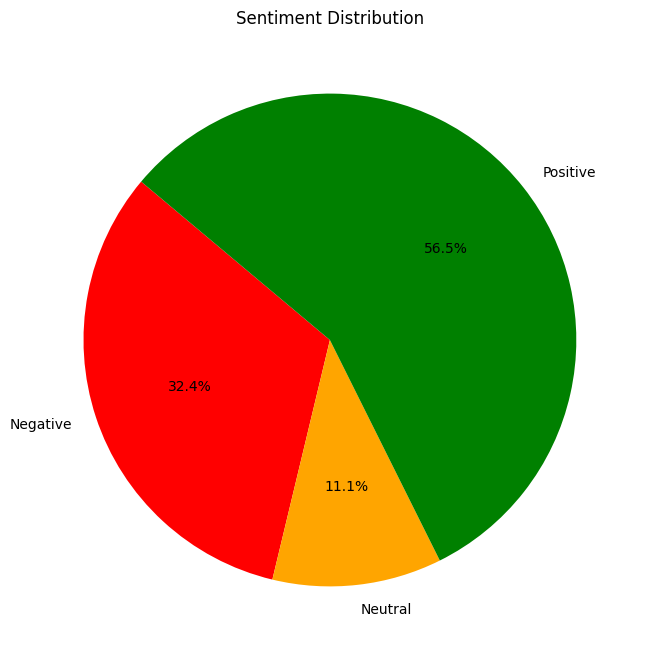

In [29]:
# Count the occurrences of each sentiment
sentiments = senti_Ganjar['Sentimen_value'].value_counts()

# Create a pie chart
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red', 'orange', 'green'])
plt.title('Sentiment Distribution')
plt.show()

# 6. **Data Split**

---


In [30]:
from sklearn.model_selection import train_test_split

# Misalnya, X adalah fitur dan y adalah label
X_train, X_test, y_train, y_test = train_test_split(senti_Ganjar['clean_text'],senti_Ganjar['label'], test_size=0.2, random_state=42)


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# 7. **Analisis Menggunakan Naive Bayes**

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)

MultinomialNB()

In [38]:
# Predictions on the test set
predictions = naive_bayes.predict(X_test_vectorized)

# Evaluate the model
accuracy_NB = accuracy_score(y_test, predictions)
print(f'Accuracy of Naive Bayes Multinomial classifier on test set: {accuracy_NB:.2f}')

# Classification report
print('\nClassification Report:\n', classification_report(y_test, predictions))

# Confusion matrix
conf_matrix_NB = confusion_matrix(y_test, predictions)

#confusion Confusion_matrix percent
conf_matrix_NB_percent = conf_matrix_NB.astype('float')/ conf_matrix_NB.sum(axis=1)[:, np.newaxis]

print('\nConfusion Matrix:\n', conf_matrix_NB)


Accuracy of Naive Bayes Multinomial classifier on test set: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.77      0.74        30
           1       0.33      0.08      0.13        12
           2       0.81      0.90      0.85        61

    accuracy                           0.77       103
   macro avg       0.62      0.58      0.58       103
weighted avg       0.73      0.77      0.74       103


Confusion Matrix:
 [[23  2  5]
 [ 3  1  8]
 [ 6  0 55]]


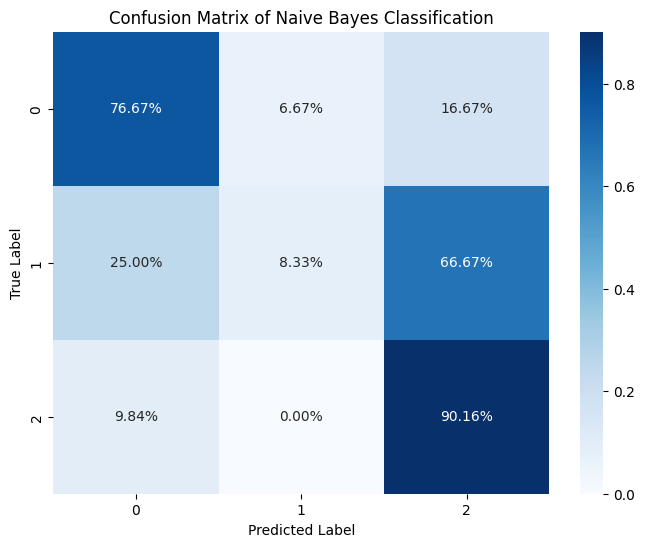

In [42]:
# Example: Confusion Matrix Heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_NB_percent, annot=True, cmap='Blues', xticklabels=naive_bayes.classes_, yticklabels=naive_bayes.classes_, fmt='.2%')
plt.title('Confusion Matrix of Naive Bayes Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 8. **Analisis Menggunakan Regresi Logistik**


In [43]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_vectorized, y_train)

LogisticRegression()

In [47]:
# Prediksi pada set pengujian
predictions = logistic_regression.predict(X_test_vectorized)

# Evaluasi model
accuracy_RL = accuracy_score(y_test, predictions)
print(f'Accuracy of Logistic Regression classifier on test set: {accuracy_RL:.2f}')

# Laporan klasifikasi
print('\nLaporan Klasifikasi:\n', classification_report(y_test, predictions))

# Matriks kebingungan
conf_matrix_LR = confusion_matrix(y_test, predictions)

conf_matrix_LR_percent = conf_matrix_LR.astype('float')/ conf_matrix_NB.sum(axis=1)[:, np.newaxis]


print('\nConfusion Matrix:\n', conf_matrix_LR)

Accuracy of Logistic Regression classifier on test set: 0.77

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.84      0.70      0.76        30
           1       0.00      0.00      0.00        12
           2       0.76      0.95      0.85        61

    accuracy                           0.77       103
   macro avg       0.53      0.55      0.54       103
weighted avg       0.70      0.77      0.72       103


Confusion Matrix:
 [[21  1  8]
 [ 2  0 10]
 [ 2  1 58]]


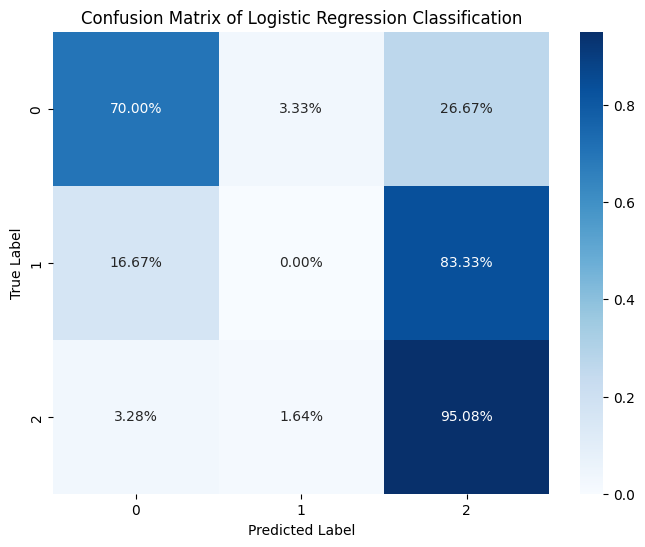

In [48]:
# Example: Confusion Matrix Heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_LR_percent, annot=True, cmap='Blues', xticklabels=naive_bayes.classes_, yticklabels=naive_bayes.classes_, fmt='.2%')
plt.title('Confusion Matrix of Logistic Regression Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 9. **Confusion Matrix**

In [49]:
print('Accuration of Naive Bayes Multinomial Classification :', accuracy_NB)
print('Accuration of Logistic Regression Classification :', accuracy_RL)

Accuration of Naive Bayes Multinomial Classification : 0.7669902912621359
Accuration of Logistic Regression Classification : 0.7669902912621359
